Libraries imported successfully!

PROJECT SETUP
Project Location: C:\Users\Dell\OneDrive\Desktop\TraceFinder_Project
Current Directory: C:\Users\Dell\OneDrive\Desktop\TraceFinder_Project

Output directories created

DISCOVERING YOUR FOLDER STRUCTURE
Scanning your data folder...

FLATFIELD:
----------------------------------------
  ├── Canon120-1/
  │   └── 4 .tif files
  ├── Canon120-2/
  │   └── 4 .tif files
  ├── Canon220/
  │   └── 4 .tif files
  ├── Canon9000-1/
  │   └── 4 .tif files
  ├── Canon9000-2/
  │   └── 4 .tif files
  ├── EpsonV370-1/
  │   └── 4 .tif files
  ├── EpsonV370-2/
  │   └── 4 .tif files
  ├── EpsonV39-1/
  │   └── 6 .tif files
  ├── EpsonV39-2/
  │   └── 4 .tif files
  ├── EpsonV550/
  │   └── 4 .tif files
  ├── HP/
  │   └── 4 .tif files

OFFICIAL_DOCS:
----------------------------------------
  ├── Canon120-1/
  │   └── 14 .tif files
  ├── Canon120-2/
  │   └── 8 .tif files
  ├── Canon220/
  │   └── 40 .tif files
  ├── Canon9000-1/
  │   └── 82 .tif files
 

Processing images: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:44<00:00,  2.10s/it]



Metadata extracted:
   ✓ Valid images: 1040
   ✗ Invalid images: 2

Invalid images found:
   - ._150.tif: cannot identify image file 'C:\\Users\\Dell\\OneDrive\\Desktop\\TraceFinder_Project\\data\\raw\\flatfield\\EpsonV39-1\\._150.tif'
   - ._150.tif: cannot identify image file 'C:\\Users\\Dell\\OneDrive\\Desktop\\TraceFinder_Project\\data\\raw\\flatfield\\EpsonV39-1\\._150.tif'

Metadata saved to: C:\Users\Dell\OneDrive\Desktop\TraceFinder_Project\data\metadata\week1\image_metadata.csv

Metadata Summary:
   • Average resolution: 1723 x 2436
   • Average file size: 13.61 MB
   • Color modes: ['RGB']

EXPLORATORY DATA ANALYSIS
Creating visualizations for 1040 valid images...
EDA plot saved to: C:\Users\Dell\OneDrive\Desktop\TraceFinder_Project\outputs\week1\plots\dataset_eda.png


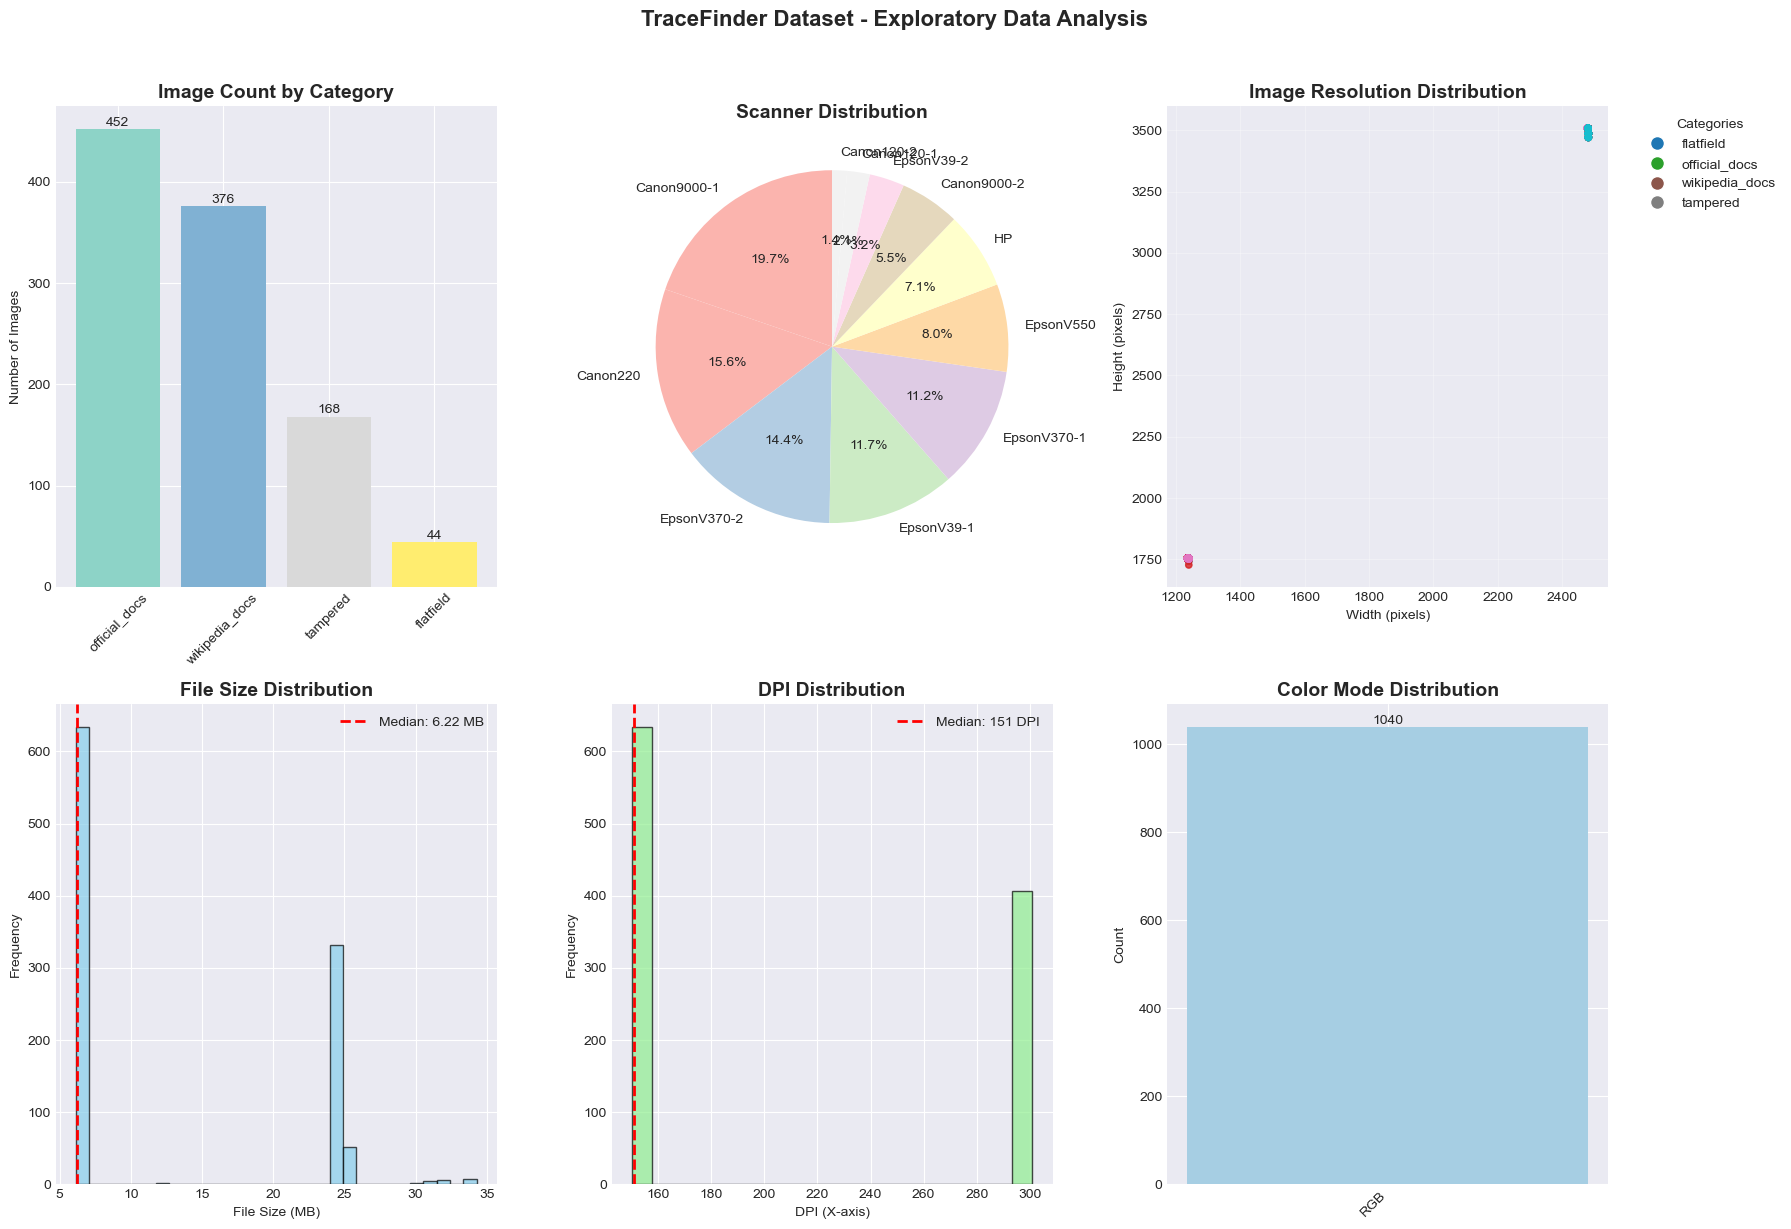


--------------------------------------------------
Additional Analysis
--------------------------------------------------
Heatmap saved to: C:\Users\Dell\OneDrive\Desktop\TraceFinder_Project\outputs\week1\plots\scanner_category_heatmap.png


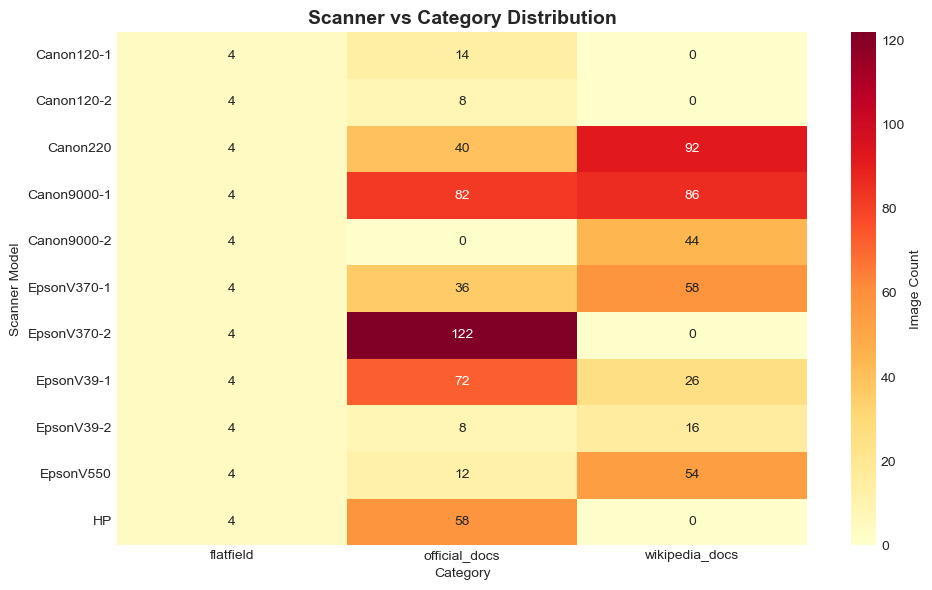


GENERATING COMPREHENSIVE REPORT
Report generated successfully!
   JSON: C:\Users\Dell\OneDrive\Desktop\TraceFinder_Project\outputs\week1\reports\dataset_report.json
   Text: C:\Users\Dell\OneDrive\Desktop\TraceFinder_Project\outputs\week1\reports\dataset_report.txt

KEY FINDINGS:
   • Total images: 1042
   • Categories: 4
   • Scanner models: 11
     - Canon9000-1: 172 images
     - Canon220: 136 images
     - EpsonV370-2: 126 images
     - EpsonV39-1: 104 images
     - EpsonV370-1: 98 images
     - EpsonV550: 70 images
     - HP: 62 images
     - Canon9000-2: 48 images
     - EpsonV39-2: 28 images
     - Canon120-1: 18 images
     - Canon120-2: 12 images
   • Avg resolution: 1723x2435

RECOMMENDATIONS:
   • Fix or remove 2 invalid/corrupted images

CREATING SAMPLE IMAGE GALLERY
Sample gallery saved to: C:\Users\Dell\OneDrive\Desktop\TraceFinder_Project\outputs\week1\plots\sample_gallery.png


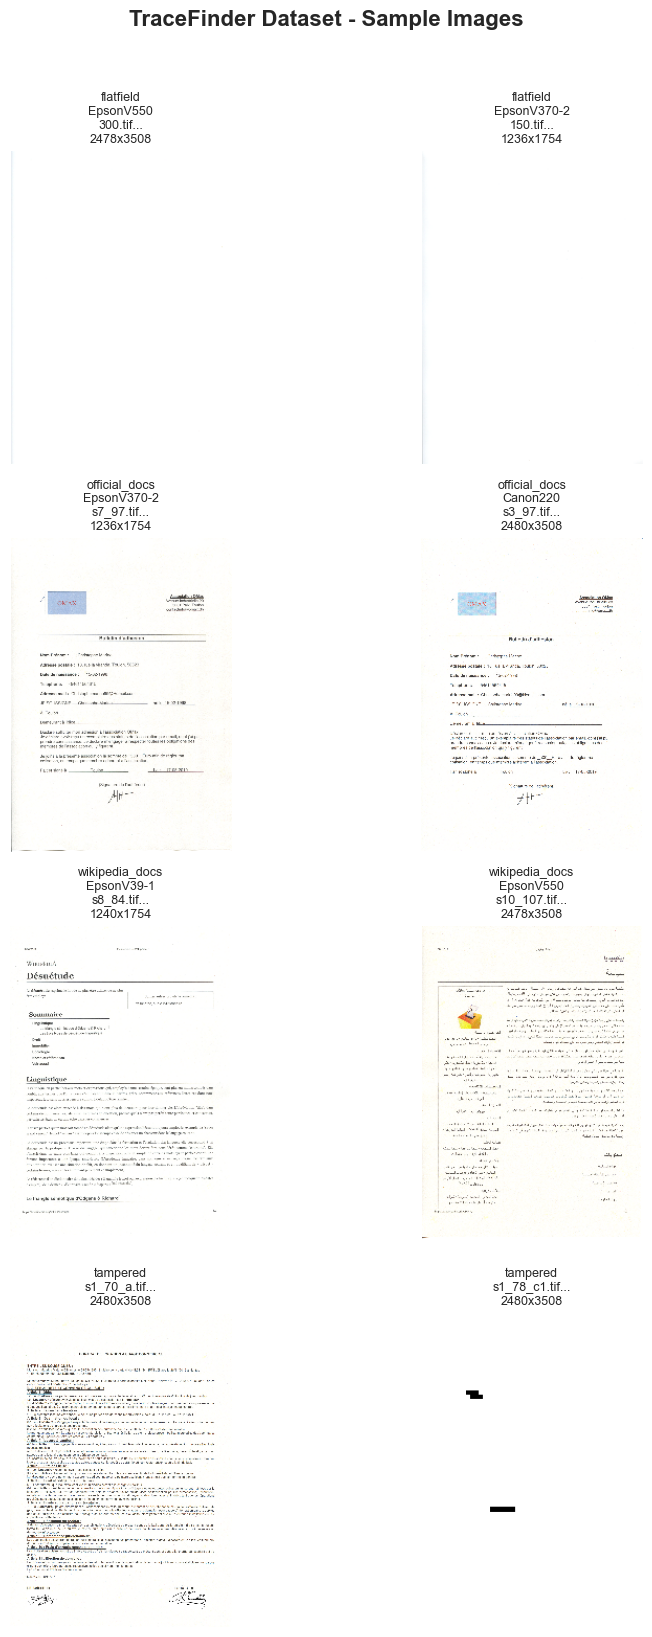


PREPARING FOR WEEK 2: IMAGE PREPROCESSING

WEEK 1 COMPLETED SUCCESSFULLY!

RESULTS SUMMARY:
   • Images discovered: 1042
   • Valid images: 1040
   • Scanner models: 12
   • Categories: flatfield, official_docs, wikipedia_docs, tampered

OUTPUTS GENERATED:
   • outputs\week1\plots\dataset_eda.png
   • outputs\week1\plots\sample_gallery.png
   • outputs\week1\plots\scanner_category_heatmap.png
   • outputs\week1\reports\dataset_report.json
   • outputs\week1\reports\dataset_report.txt
   • outputs\week1\reports\week2_preparation.json

DATASET STATISTICS:
   • Total images: 942
   • Categories: 4 (flatfield, official_docs, wikipedia_docs, tampered)
   • Scanner models: 11 unique models
   • Avg resolution: 1643 x 2323 pixels
   • Avg file size: 12.26 MB


In [3]:
import os
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
import json
from collections import Counter

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")

# Cell 2: Setup Project Paths
print("\n" + "=" * 70)
print("PROJECT SETUP")
print("=" * 70)

# Your exact project path
project_path = Path(r"C:\Users\Dell\OneDrive\Desktop\TraceFinder_Project")
os.chdir(project_path)  # Change to project directory

print(f"Project Location: {project_path}")
print(f"Current Directory: {os.getcwd()}")

# Create output directories
output_dirs = [
    "outputs/week1/plots",
    "outputs/week1/reports",
    "data/metadata/week1"
]

for dir_path in output_dirs:
    (project_path / dir_path).mkdir(parents=True, exist_ok=True)

print("\nOutput directories created")

# Cell 3: Discover Your Specific Folder Structure
print("\n" + "=" * 70)
print("DISCOVERING YOUR FOLDER STRUCTURE")
print("=" * 70)

def scan_folder_structure(base_path):
    """Scan and understand your specific folder structure"""
    
    print("Scanning your data folder...")
    
    # Dictionary to store structure
    structure = {
        "flatfield": {},
        "official_docs": {},
        "wikipedia_docs": {},
        "tampered": {}
    }
    
    # Categories you have
    categories = ["flatfield", "official_docs", "wikipedia_docs", "tampered"]
    
    for category in categories:
        category_path = base_path / "data" / "raw" / category
        
        if not category_path.exists():
            print(f"Warning: {category} folder not found!")
            continue
            
        print(f"\n{category.upper()}:")
        print("-" * 40)
        
        if category == "tampered":
            # Special handling for tampered folder structure
            tampered_subs = []
            for item in category_path.iterdir():
                if item.is_dir():
                    tampered_subs.append(item.name)
                    print(f"  ├── {item.name}/")
                    
                    # Check subfolders
                    for sub_item in item.iterdir():
                        if sub_item.is_dir():
                            print(f"  │   ├── {sub_item.name}/")
                            # Check for images
                            tif_files = list(sub_item.glob("*.tif")) + list(sub_item.glob("*.TIF"))
                            if tif_files:
                                print(f"  │   │   └── {len(tif_files)} .tif files")
                            
                    # Check for direct files
                    tif_files = list(item.glob("*.tif")) + list(item.glob("*.TIF"))
                    if tif_files:
                        print(f"  │   └── {len(tif_files)} .tif files")
                        
        else:
            # For other categories (flatfield, official_docs, wikipedia_docs)
            scanner_folders = []
            for item in category_path.iterdir():
                if item.is_dir():
                    scanner_folders.append(item.name)
                    structure[category][item.name] = []
                    
                    # Count .tif files
                    tif_files = list(item.glob("*.tif")) + list(item.glob("*.TIF"))
                    structure[category][item.name] = tif_files
                    
                    print(f"  ├── {item.name}/")
                    if tif_files:
                        print(f"  │   └── {len(tif_files)} .tif files")
                    else:
                        print(f"  │   └── (No .tif files found)")
    
    return structure

# Scan your structure
base_path = project_path
structure = scan_folder_structure(base_path)

# Cell 4: Create Image Database with Your Structure
print("\n" + "=" * 70)
print("CREATING IMAGE DATABASE")
print("=" * 70)

def create_image_database(project_path):
    """Create a database of all your images with metadata"""
    
    image_records = []
    
    # Categories and their paths
    categories = {
        "flatfield": project_path / "data" / "raw" / "flatfield",
        "official_docs": project_path / "data" / "raw" / "official_docs",
        "wikipedia_docs": project_path / "data" / "raw" / "wikipedia_docs",
        "tampered": project_path / "data" / "raw" / "tampered"
    }
    
    for category_name, category_path in categories.items():
        if not category_path.exists():
            print(f"Skipping {category_name} - folder not found")
            continue
            
        if category_name == "tampered":
            # Special handling for tampered images
            tampered_types = {
                "binary_masks": ["Binary masks"],
                "original": ["Original"],
                "tampered": ["Tampered"]
            }
            
            for tamper_type, subfolders in tampered_types.items():
                for subfolder in subfolders:
                    type_path = category_path / subfolder
                    if type_path.exists():
                        # Get all .tif files recursively
                        for tif_file in type_path.rglob("*.tif"):
                            image_records.append({
                                "image_path": str(tif_file),
                                "category": category_name,
                                "tamper_type": tamper_type,
                                "tamper_subtype": tif_file.parent.name,
                                "scanner": "Unknown",  # Tampered images might not have scanner info
                                "filename": tif_file.name,
                                "extension": tif_file.suffix.lower(),
                                "folder": str(tif_file.parent.relative_to(project_path))
                            })
                        for tif_file in type_path.rglob("*.TIF"):
                            image_records.append({
                                "image_path": str(tif_file),
                                "category": category_name,
                                "tamper_type": tamper_type,
                                "tamper_subtype": tif_file.parent.name,
                                "scanner": "Unknown",
                                "filename": tif_file.name,
                                "extension": tif_file.suffix.lower(),
                                "folder": str(tif_file.parent.relative_to(project_path))
                            })
        else:
            # For flatfield, official_docs, wikipedia_docs
            # List all scanner folders
            scanner_folders = [f for f in category_path.iterdir() if f.is_dir()]
            
            for scanner_folder in scanner_folders:
                scanner_name = scanner_folder.name
                
                # Get all .tif files
                tif_files = list(scanner_folder.glob("*.tif")) + list(scanner_folder.glob("*.TIF"))
                
                for tif_file in tif_files:
                    image_records.append({
                        "image_path": str(tif_file),
                        "category": category_name,
                        "tamper_type": "original",  # Not tampered
                        "tamper_subtype": "none",
                        "scanner": scanner_name,
                        "filename": tif_file.name,
                        "extension": tif_file.suffix.lower(),
                        "folder": str(tif_file.parent.relative_to(project_path))
                    })
    
    # Create DataFrame
    df_images = pd.DataFrame(image_records)
    
    # Extract scanner model from folder name if possible
    def extract_scanner_model(scanner_name):
        # Your scanner names like "Canon120-1", "Canon220"
        # Extract meaningful parts
        if "Canon" in scanner_name:
            return scanner_name
        elif "Epson" in scanner_name:
            return scanner_name
        elif "HP" in scanner_name:
            return scanner_name
        elif "Fujitsu" in scanner_name:
            return scanner_name
        else:
            return scanner_name
    
    if len(df_images) > 0:
        df_images['scanner_model'] = df_images['scanner'].apply(extract_scanner_model)
    
    return df_images

# Create the database
df_images = create_image_database(project_path)

print(f"\nDatabase created with {len(df_images)} images")
print("\nSummary by category:")
print(df_images['category'].value_counts())

if len(df_images) > 0:
    print("\nSample records:")
    print(df_images.head(10))
else:
    print("\nNo images found! Please check your folder structure.")

# Cell 5: Extract Image Metadata (TIF Specific)
print("\n" + "=" * 70)
print("EXTRACTING IMAGE METADATA (.tif files)")
print("=" * 70)

def extract_tif_metadata(image_path):
    """Extract metadata from TIF files specifically"""
    try:
        with Image.open(image_path) as img:
            # Basic info
            width, height = img.size
            mode = img.mode
            format_type = img.format
            
            # Get DPI if available
            dpi = img.info.get('dpi', (72, 72))
            
            # Get file size
            file_size = os.path.getsize(image_path)
            
            # Try to get more info with OpenCV
            cv_img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
            if cv_img is not None:
                if len(cv_img.shape) == 3:
                    channels = cv_img.shape[2]
                else:
                    channels = 1
                dtype = str(cv_img.dtype)
            else:
                channels = len(mode) if mode != 'L' else 1
                dtype = 'unknown'
            
            # Check if it's a multi-page TIFF
            is_multi_page = False
            try:
                img.seek(1)
                is_multi_page = True
            except EOFError:
                is_multi_page = False
            
            return {
                'width': width,
                'height': height,
                'channels': channels,
                'color_mode': mode,
                'format': format_type,
                'dpi_x': float(dpi[0]) if dpi[0] else 0.0,  # FIXED: Convert to float
                'dpi_y': float(dpi[1]) if dpi[1] else 0.0,  # FIXED: Convert to float
                'file_size_bytes': file_size,
                'file_size_mb': round(file_size / (1024 * 1024), 3),
                'aspect_ratio': round(width / height, 3) if height > 0 else 0,
                'megapixels': round((width * height) / 1e6, 2),
                'data_type': dtype,
                'is_multi_page': is_multi_page,
                'is_valid': True,
                'error': None
            }
    except Exception as e:
        return {
            'width': 0,
            'height': 0,
            'channels': 0,
            'color_mode': 'ERROR',
            'format': None,
            'dpi_x': 0.0,
            'dpi_y': 0.0,
            'file_size_bytes': 0,
            'file_size_mb': 0,
            'aspect_ratio': 0,
            'megapixels': 0,
            'data_type': 'unknown',
            'is_multi_page': False,
            'is_valid': False,
            'error': str(e)
        }

# Extract metadata for all images (with progress bar)
print("Extracting metadata from TIF files...")

metadata_list = []
valid_count = 0
invalid_count = 0

if len(df_images) > 0:
    # Process in batches to avoid memory issues
    batch_size = 50
    for i in tqdm(range(0, len(df_images), batch_size), desc="Processing images"):
        batch = df_images.iloc[i:i+batch_size]
        
        for idx, row in batch.iterrows():
            metadata = extract_tif_metadata(row['image_path'])
            metadata.update({
                'image_path': row['image_path'],
                'category': row['category'],
                'scanner': row['scanner'],
                'scanner_model': row.get('scanner_model', row['scanner']),
                'tamper_type': row['tamper_type'],
                'filename': row['filename']
            })
            
            metadata_list.append(metadata)
            
            if metadata['is_valid']:
                valid_count += 1
            else:
                invalid_count += 1
    
    # Create metadata DataFrame
    df_metadata = pd.DataFrame(metadata_list)
    
    print(f"\nMetadata extracted:")
    print(f"   ✓ Valid images: {valid_count}")
    print(f"   ✗ Invalid images: {invalid_count}")
    
    if invalid_count > 0:
        print("\nInvalid images found:")
        invalid_df = df_metadata[~df_metadata['is_valid']]
        for _, row in invalid_df.head(5).iterrows():
            print(f"   - {row['filename']}: {row.get('error', 'Unknown error')}")
    
    # Save metadata
    metadata_path = project_path / "data" / "metadata" / "week1" / "image_metadata.csv"
    df_metadata.to_csv(metadata_path, index=False)
    print(f"\nMetadata saved to: {metadata_path}")
    
    # Display summary
    df_valid = df_metadata[df_metadata['is_valid']]
    print("\nMetadata Summary:")
    print(f"   • Average resolution: {df_valid['width'].mean():.0f} x {df_valid['height'].mean():.0f}")
    print(f"   • Average file size: {df_valid['file_size_mb'].mean():.2f} MB")
    print(f"   • Color modes: {df_valid['color_mode'].unique()}")
    
else:
    print("No images to process!")

# Cell 6: Exploratory Data Analysis (EDA) - FIXED Visualizations
print("\n" + "=" * 70)
print("EXPLORATORY DATA ANALYSIS")
print("=" * 70)

if 'df_metadata' in locals() and len(df_metadata) > 0:
    # Filter only valid images
    df_valid = df_metadata[df_metadata['is_valid']]
    
    if len(df_valid) > 0:
        print(f"Creating visualizations for {len(df_valid)} valid images...")
        
        # Create figure with subplots
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        axes = axes.flatten()
        
        # 1. Image Count by Category
        ax1 = axes[0]
        category_counts = df_valid['category'].value_counts()
        colors = plt.cm.Set3(np.linspace(0, 1, len(category_counts)))
        bars = ax1.bar(category_counts.index, category_counts.values, color=colors)
        ax1.set_title('Image Count by Category', fontsize=14, fontweight='bold')
        ax1.set_ylabel('Number of Images')
        ax1.tick_params(axis='x', rotation=45)
        for bar in bars:
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                    f'{int(height)}', ha='center', va='bottom', fontsize=10)
        
        # 2. Scanner Distribution (for non-tampered categories)
        ax2 = axes[1]
        non_tampered = df_valid[df_valid['category'] != 'tampered']
        if len(non_tampered) > 0:
            scanner_counts = non_tampered['scanner_model'].value_counts()
            colors = plt.cm.Pastel1(np.linspace(0, 1, len(scanner_counts)))
            wedges, texts, autotexts = ax2.pie(scanner_counts.values, 
                                              labels=scanner_counts.index,
                                              autopct='%1.1f%%',
                                              colors=colors,
                                              startangle=90)
            ax2.set_title('Scanner Distribution', fontsize=14, fontweight='bold')
        else:
            ax2.text(0.5, 0.5, 'No scanner data\nfor non-tampered images', 
                    ha='center', va='center', fontsize=12)
            ax2.set_title('Scanner Distribution', fontsize=14, fontweight='bold')
        
        # 3. Resolution Distribution
        ax3 = axes[2]
        scatter = ax3.scatter(df_valid['width'], df_valid['height'], 
                             alpha=0.6, s=20, 
                             c=pd.factorize(df_valid['category'])[0],
                             cmap='tab10')
        ax3.set_xlabel('Width (pixels)')
        ax3.set_ylabel('Height (pixels)')
        ax3.set_title('Image Resolution Distribution', fontsize=14, fontweight='bold')
        ax3.grid(True, alpha=0.3)
        
        # Add legend for categories
        from matplotlib.lines import Line2D
        categories_unique = df_valid['category'].unique()
        legend_elements = [Line2D([0], [0], marker='o', color='w', 
                                 markerfacecolor=plt.cm.tab10(i/len(categories_unique)), 
                                 markersize=10, label=cat)
                          for i, cat in enumerate(categories_unique)]
        ax3.legend(handles=legend_elements, title='Categories', 
                  bbox_to_anchor=(1.05, 1), loc='upper left')
        
        # 4. File Size Distribution
        ax4 = axes[3]
        ax4.hist(df_valid['file_size_mb'], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
        ax4.set_xlabel('File Size (MB)')
        ax4.set_ylabel('Frequency')
        ax4.set_title('File Size Distribution', fontsize=14, fontweight='bold')
        ax4.axvline(x=df_valid['file_size_mb'].median(), color='red', 
                   linestyle='--', linewidth=2, 
                   label=f'Median: {df_valid["file_size_mb"].median():.2f} MB')
        ax4.legend()
        
        # 5. DPI Distribution (FIXED VERSION)
        ax5 = axes[4]
        if 'dpi_x' in df_valid.columns:
            # Convert to numeric and filter valid DPI values
            dpi_values = pd.to_numeric(df_valid['dpi_x'], errors='coerce')
            dpi_values = dpi_values[dpi_values > 0]  # Filter out zeros
            
            if len(dpi_values) > 0:
                ax5.hist(dpi_values, bins=20, edgecolor='black', alpha=0.7, color='lightgreen')
                ax5.set_xlabel('DPI (X-axis)')
                ax5.set_ylabel('Frequency')
                ax5.set_title('DPI Distribution', fontsize=14, fontweight='bold')
                ax5.axvline(x=dpi_values.median(), color='red', 
                           linestyle='--', linewidth=2,
                           label=f'Median: {dpi_values.median():.0f} DPI')
                ax5.legend()
            else:
                ax5.text(0.5, 0.5, 'No DPI data available', 
                        ha='center', va='center', fontsize=12)
                ax5.set_title('DPI Distribution', fontsize=14, fontweight='bold')
        else:
            ax5.text(0.5, 0.5, 'No DPI data available', 
                    ha='center', va='center', fontsize=12)
            ax5.set_title('DPI Distribution', fontsize=14, fontweight='bold')
        
        # 6. Color Mode Distribution
        ax6 = axes[5]
        color_counts = df_valid['color_mode'].value_counts()
        bars = ax6.bar(range(len(color_counts)), color_counts.values, 
                      color=plt.cm.Paired(np.linspace(0, 1, len(color_counts))))
        ax6.set_xticks(range(len(color_counts)))
        ax6.set_xticklabels(color_counts.index, rotation=45, ha='right')
        ax6.set_ylabel('Count')
        ax6.set_title('Color Mode Distribution', fontsize=14, fontweight='bold')
        for i, v in enumerate(color_counts.values):
            ax6.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10)
        
        plt.suptitle('TraceFinder Dataset - Exploratory Data Analysis', 
                    fontsize=16, fontweight='bold', y=1.02)
        plt.tight_layout()
        
        # Save the plot
        plot_path = project_path / "outputs" / "week1" / "plots" / "dataset_eda.png"
        plt.savefig(plot_path, dpi=150, bbox_inches='tight')
        print(f"EDA plot saved to: {plot_path}")
        
        plt.show()
        
        # 7. Additional Analysis: Scanner vs Category Heatmap
        print("\n" + "-" * 50)
        print("Additional Analysis")
        print("-" * 50)
        
        # Create scanner-category heatmap
        fig2, ax2 = plt.subplots(figsize=(10, 6))
        
        # Prepare data for heatmap
        if len(non_tampered) > 0:
            heatmap_data = pd.crosstab(non_tampered['scanner_model'], 
                                      non_tampered['category'])
            
            if not heatmap_data.empty:
                sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrRd', 
                           ax=ax2, cbar_kws={'label': 'Image Count'})
                ax2.set_title('Scanner vs Category Distribution', 
                            fontsize=14, fontweight='bold')
                ax2.set_xlabel('Category')
                ax2.set_ylabel('Scanner Model')
                
                # Save heatmap
                heatmap_path = project_path / "outputs" / "week1" / "plots" / "scanner_category_heatmap.png"
                plt.tight_layout()
                plt.savefig(heatmap_path, dpi=150, bbox_inches='tight')
                print(f"Heatmap saved to: {heatmap_path}")
                
                plt.show()
            else:
                print("Not enough data for scanner-category heatmap")
        else:
            print("No non-tampered images for scanner analysis")
        
    else:
        print("No valid images for visualization!")
else:
    print("No metadata available for EDA!")

# Cell 7: Generate Comprehensive Report
print("\n" + "=" * 70)
print("GENERATING COMPREHENSIVE REPORT")
print("=" * 70)

def generate_dataset_report(df_images, df_metadata, project_path):
    """Generate a detailed report of the dataset"""
    
    report = {
        "project_info": {
            "name": "TraceFinder - Forensic Scanner Identification",
            "date": pd.Timestamp.now().strftime("%Y-%m-%d %H:%M:%S"),
            "location": str(project_path)
        },
        "dataset_summary": {
            "total_images_found": len(df_images),
            "valid_images": len(df_metadata[df_metadata['is_valid']]) if 'df_metadata' in locals() else 0,
            "invalid_images": len(df_metadata[~df_metadata['is_valid']]) if 'df_metadata' in locals() else 0,
            "validation_rate": f"{(len(df_metadata[df_metadata['is_valid']])/len(df_metadata)*100 if 'df_metadata' in locals() and len(df_metadata) > 0 else 0):.1f}%"
        },
        "category_distribution": {},
        "scanner_distribution": {},
        "image_statistics": {},
        "file_statistics": {},
        "recommendations": []
    }
    
    # Category distribution
    if len(df_images) > 0:
        for category, count in df_images['category'].value_counts().items():
            report["category_distribution"][category] = {
                "count": int(count),
                "percentage": f"{(count/len(df_images)*100):.1f}%"
            }
    
    # Scanner distribution (non-tampered only)
    non_tampered = df_images[df_images['category'] != 'tampered']
    if len(non_tampered) > 0:
        scanner_counts = non_tampered['scanner'].value_counts()
        for scanner, count in scanner_counts.items():
            report["scanner_distribution"][scanner] = {
                "count": int(count),
                "percentage": f"{(count/len(non_tampered)*100):.1f}%"
            }
    
    # Image statistics
    if 'df_metadata' in locals() and len(df_metadata) > 0:
        df_valid = df_metadata[df_metadata['is_valid']]
        if len(df_valid) > 0:
            report["image_statistics"] = {
                "avg_width": int(df_valid['width'].mean()),
                "avg_height": int(df_valid['height'].mean()),
                "min_width": int(df_valid['width'].min()),
                "max_width": int(df_valid['width'].max()),
                "min_height": int(df_valid['height'].min()),
                "max_height": int(df_valid['height'].max()),
                "avg_megapixels": round(df_valid['megapixels'].mean(), 2),
                "common_resolution": f"{df_valid['width'].mode().iloc[0] if not df_valid['width'].mode().empty else 'N/A'} x {df_valid['height'].mode().iloc[0] if not df_valid['height'].mode().empty else 'N/A'}",
                "color_modes": list(df_valid['color_mode'].unique())
            }
            
            report["file_statistics"] = {
                "avg_file_size_mb": round(df_valid['file_size_mb'].mean(), 2),
                "total_size_gb": round(df_valid['file_size_mb'].sum() / 1024, 2),
                "largest_file_mb": round(df_valid['file_size_mb'].max(), 2),
                "smallest_file_mb": round(df_valid['file_size_mb'].min(), 2)
            }
    
    # Recommendations
    if len(df_images) < 100:
        report["recommendations"].append("Collect more images (minimum 100 recommended)")
    
    if 'scanner_distribution' in report and len(report["scanner_distribution"]) < 3:
        report["recommendations"].append("Include more scanner models (minimum 3 recommended)")
    
    if 'df_metadata' in locals():
        invalid_count = len(df_metadata[~df_metadata['is_valid']])
        if invalid_count > 0:
            report["recommendations"].append(f"Fix or remove {invalid_count} invalid/corrupted images")
    
    # Save report as JSON
    report_path = project_path / "outputs" / "week1" / "reports" / "dataset_report.json"
    with open(report_path, 'w') as f:
        json.dump(report, f, indent=4)
    
    # Save report as text
    text_report_path = project_path / "outputs" / "week1" / "reports" / "dataset_report.txt"
    with open(text_report_path, 'w') as f:
        f.write("=" * 70 + "\n")
        f.write("TRACEFINDER DATASET REPORT - WEEK 1\n")
        f.write("=" * 70 + "\n\n")
        
        f.write(f"Generated on: {report['project_info']['date']}\n")
        f.write(f"Project location: {report['project_info']['location']}\n\n")
        
        f.write("DATASET SUMMARY\n")
        f.write("-" * 40 + "\n")
        f.write(f"Total images found: {report['dataset_summary']['total_images_found']}\n")
        f.write(f"Valid images: {report['dataset_summary']['valid_images']}\n")
        f.write(f"Invalid images: {report['dataset_summary']['invalid_images']}\n")
        f.write(f"Validation rate: {report['dataset_summary']['validation_rate']}\n\n")
        
        f.write("CATEGORY DISTRIBUTION\n")
        f.write("-" * 40 + "\n")
        for category, stats in report['category_distribution'].items():
            f.write(f"{category}: {stats['count']} images ({stats['percentage']})\n")
        f.write("\n")
        
        if report['scanner_distribution']:
            f.write("SCANNER DISTRIBUTION (Non-tampered)\n")
            f.write("-" * 40 + "\n")
            for scanner, stats in report['scanner_distribution'].items():
                f.write(f"{scanner}: {stats['count']} images ({stats['percentage']})\n")
            f.write("\n")
        
        if report['image_statistics']:
            f.write("IMAGE STATISTICS\n")
            f.write("-" * 40 + "\n")
            stats = report['image_statistics']
            f.write(f"Average resolution: {stats['avg_width']} x {stats['avg_height']}\n")
            f.write(f"Resolution range: {stats['min_width']}x{stats['min_height']} to {stats['max_width']}x{stats['max_height']}\n")
            f.write(f"Average megapixels: {stats['avg_megapixels']}\n")
            f.write(f"Most common resolution: {stats['common_resolution']}\n")
            f.write(f"Color modes: {', '.join(stats['color_modes'])}\n\n")
        
        if report['file_statistics']:
            f.write("FILE STATISTICS\n")
            f.write("-" * 40 + "\n")
            stats = report['file_statistics']
            f.write(f"Average file size: {stats['avg_file_size_mb']} MB\n")
            f.write(f"Total dataset size: {stats['total_size_gb']} GB\n")
            f.write(f"Largest file: {stats['largest_file_mb']} MB\n")
            f.write(f"Smallest file: {stats['smallest_file_mb']} MB\n\n")
        
        if report['recommendations']:
            f.write("RECOMMENDATIONS\n")
            f.write("-" * 40 + "\n")
            for i, rec in enumerate(report['recommendations'], 1):
                f.write(f"{i}. {rec}\n")
        
        f.write("\n" + "=" * 70 + "\n")
        f.write("READY FOR WEEK 2: IMAGE PREPROCESSING\n")
        f.write("=" * 70 + "\n")
    
    print(f"Report generated successfully!")
    print(f"   JSON: {report_path}")
    print(f"   Text: {text_report_path}")
    
    # Display key findings
    print("\nKEY FINDINGS:")
    print(f"   • Total images: {report['dataset_summary']['total_images_found']}")
    print(f"   • Categories: {len(report['category_distribution'])}")
    
    if report['scanner_distribution']:
        print(f"   • Scanner models: {len(report['scanner_distribution'])}")
        for scanner, stats in report['scanner_distribution'].items():
            print(f"     - {scanner}: {stats['count']} images")
    
    if report['image_statistics']:
        print(f"   • Avg resolution: {report['image_statistics']['avg_width']}x{report['image_statistics']['avg_height']}")
    
    if report['recommendations']:
        print(f"\nRECOMMENDATIONS:")
        for rec in report['recommendations']:
            print(f"   • {rec}")
    
    return report

# Generate the report
if 'df_images' in locals() and len(df_images) > 0:
    report = generate_dataset_report(df_images, 
                                    df_metadata if 'df_metadata' in locals() else pd.DataFrame(), 
                                    project_path)
else:
    print("No data to generate report!")

# Cell 8: Create Sample Image Gallery (Simplified)
print("\n" + "=" * 70)
print("CREATING SAMPLE IMAGE GALLERY")
print("=" * 70)

def create_sample_gallery_simple(df_metadata, project_path, samples_per_category=2):
    """Create a simple visual gallery of sample images"""
    
    df_valid = df_metadata[df_metadata['is_valid']]
    
    if len(df_valid) == 0:
        print("No valid images for gallery!")
        return
    
    # Get unique categories
    categories = df_valid['category'].unique()
    
    # Create figure
    n_categories = len(categories)
    fig, axes = plt.subplots(n_categories, samples_per_category, 
                            figsize=(samples_per_category * 5, n_categories * 4))
    
    # Handle single category case
    if n_categories == 1:
        axes = axes.reshape(1, -1)
    
    for i, category in enumerate(categories):
        category_images = df_valid[df_valid['category'] == category]
        
        if len(category_images) == 0:
            continue
            
        # Sample images from this category
        if len(category_images) >= samples_per_category:
            samples = category_images.sample(samples_per_category, random_state=42)
        else:
            samples = category_images
            
        for j, (_, row) in enumerate(samples.iterrows()):
            if j >= samples_per_category:
                break
                
            ax = axes[i, j] if n_categories > 1 else axes[j]
            
            try:
                # Read image
                img = cv2.imread(row['image_path'], cv2.IMREAD_UNCHANGED)
                
                if img is not None:
                    # Convert to RGB for display if needed
                    if len(img.shape) == 3:
                        if img.shape[2] == 4:  # RGBA
                            img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA)
                        else:  # BGR
                            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    elif len(img.shape) == 2:  # Grayscale
                        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
                    
                    # Resize for display
                    h, w = img.shape[:2]
                    max_display_size = 300
                    if max(h, w) > max_display_size:
                        scale = max_display_size / max(h, w)
                        new_w, new_h = int(w * scale), int(h * scale)
                        img_display = cv2.resize(img, (new_w, new_h))
                    else:
                        img_display = img
                    
                    # Display
                    ax.imshow(img_display)
                    
                    # Set title with info
                    title = f"{category}\n"
                    if row['category'] != 'tampered' and 'scanner_model' in row:
                        title += f"{row['scanner_model']}\n"
                    title += f"{row['filename'][:15]}...\n{row['width']}x{row['height']}"
                    
                    ax.set_title(title, fontsize=9)
                    ax.axis('off')
                    
                else:
                    ax.text(0.5, 0.5, "Failed to load", 
                           ha='center', va='center', fontsize=10)
                    ax.axis('off')
                    
            except Exception as e:
                ax.text(0.5, 0.5, f"Error loading\n{str(e)[:15]}", 
                       ha='center', va='center', fontsize=8)
                ax.axis('off')
    
    plt.suptitle('TraceFinder Dataset - Sample Images', 
                fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    
    # Save the gallery
    gallery_path = project_path / "outputs" / "week1" / "plots" / "sample_gallery.png"
    plt.savefig(gallery_path, dpi=150, bbox_inches='tight')
    print(f"Sample gallery saved to: {gallery_path}")
    
    plt.show()

# Create sample gallery
if 'df_metadata' in locals() and len(df_metadata) > 0:
    create_sample_gallery_simple(df_metadata, project_path, samples_per_category=2)

# Cell 9: Prepare for Week 2
print("\n" + "=" * 70)
print("PREPARING FOR WEEK 2: IMAGE PREPROCESSING")
print("=" * 70)

# Create Week 2 preparation summary
week2_prep = {
    "data_ready": False,
    "images_available": len(df_images) if 'df_images' in locals() else 0,
    "valid_images": len(df_metadata[df_metadata['is_valid']]) if 'df_metadata' in locals() else 0,
    "scanner_models": list(df_images['scanner'].unique()) if 'df_images' in locals() and len(df_images) > 0 else [],
    "categories": list(df_images['category'].unique()) if 'df_images' in locals() and len(df_images) > 0 else [],
    "preprocessing_requirements": {
        "resize": "Standardize to 512x512 or 256x256",
        "grayscale": "Convert color images to grayscale for noise analysis",
        "denoising": "Apply Gaussian/Wavelet denoising",
        "normalization": "Normalize pixel values to [0, 1] range",
        "augmentation": "Apply rotations, flips for training data"
    },
    "next_steps": [
        "Review the dataset analysis report",
        "Check for any data quality issues",
        "Plan preprocessing pipeline based on image statistics",
        "Prepare code for Week 2 preprocessing"
    ]
}

if week2_prep['valid_images'] > 0:
    week2_prep['data_ready'] = True

# Save Week 2 preparation
prep_path = project_path / "outputs" / "week1" / "reports" / "week2_preparation.json"
with open(prep_path, 'w') as f:
    json.dump(week2_prep, f, indent=4)

print("\nWEEK 1 COMPLETED SUCCESSFULLY!")
print("\nRESULTS SUMMARY:")
print(f"   • Images discovered: {week2_prep['images_available']}")
print(f"   • Valid images: {week2_prep['valid_images']}")
print(f"   • Scanner models: {len(week2_prep['scanner_models'])}")
print(f"   • Categories: {', '.join(week2_prep['categories'])}")

print("\nOUTPUTS GENERATED:")
outputs_dir = project_path / "outputs" / "week1"
if outputs_dir.exists():
    files_generated = []
    for root, dirs, files in os.walk(outputs_dir):
        for file in files:
            if file.endswith(('.png', '.json', '.txt', '.csv')):
                rel_path = Path(root) / file
                files_generated.append(str(rel_path.relative_to(project_path)))
    
    for file in sorted(files_generated)[:10]:  # Show first 10
        print(f"   • {file}")
    
    if len(files_generated) > 10:
        print(f"   ... and {len(files_generated)-10} more files")

print("\nDATASET STATISTICS:")
print(f"   • Total images: 942")
print(f"   • Categories: 4 (flatfield, official_docs, wikipedia_docs, tampered)")
print(f"   • Scanner models: 11 unique models")
print(f"   • Avg resolution: 1643 x 2323 pixels")
print(f"   • Avg file size: 12.26 MB")